In [70]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandas_profiling as pp

### Original atts:
age; sex (1,0); cp (1-4); trestbps; chol; fbs (1,0); restecg (0,1,2); thalach; exang (1,0); oldpeak; slope (1,2,3); ca; thal (3,6,7); class att: 0 is healthy, 1,2,3,4 is sick.

In [71]:
hd = pd.read_csv('../data/processed.cleveland.data', header=None)
hd.columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
# TODO: Ask Bernat at what point do we split off our data for testing? Do we need to run our test data through pre-processing "on it's own"? If using jupyter, this means I am passing the data through the same statements as before, seems redundant and unnecessary.
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [72]:
hd.shape

(303, 14)

In [73]:
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [74]:
hd.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
target        int64
dtype: object

In [75]:
profile = pp.ProfileReport(hd, title="Profile Report of Heart Disease Dataset")
# profile.to_file("../data/processed/hd_data_profile.html")

In [76]:
objectAttributesKey = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal", "oldpeak", "target"]
objectAttributes = {i: "object" for i in objectAttributesKey}

integerAttributesKey = ["age", "trestbps", "chol", "thalach"]
integerAttributes = {i: "float" for i in integerAttributesKey}

attributeTypes = objectAttributes | integerAttributes
hd=hd.astype(attributeTypes)

hd.dtypes

age         float64
sex          object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalach     float64
exang        object
oldpeak      object
slope        object
ca           object
thal         object
target       object
dtype: object

In [78]:
hd.describe(include="float")

,age,trestbps,chol,thalach
count,303.000000,303.000000,303.000000,303.000000
mean,54.438944,131.689769,246.693069,149.607261
std,9.038662,17.599748,51.776918,22.875003
min,29.000000,94.000000,126.000000,71.000000
25%,48.000000,120.000000,211.000000,133.500000
50%,56.000000,130.000000,241.000000,153.000000
75%,61.000000,140.000000,275.000000,166.000000
max,77.000000,200.000000,564.000000,202.000000


In [79]:
hd.describe(include="object")

,sex,cp,fbs,restecg,exang,oldpeak,slope,ca,thal,target
count,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303,303,303
unique,2.0,4.0,2.0,3.0,2.0,40.0,3.0,5,4,5
top,1.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0
freq,206.0,144.0,258.0,151.0,204.0,99.0,142.0,176,166,164


# Taking Care of missing data

In [80]:
print(hd.shape)
hd1=hd.dropna()
print(hd1.shape)

(303, 14)
(303, 14)


# Finding Outliers

In [81]:
hd_data = hd.iloc[:, :-1].values
hd_target = hd.iloc[:, -1].values

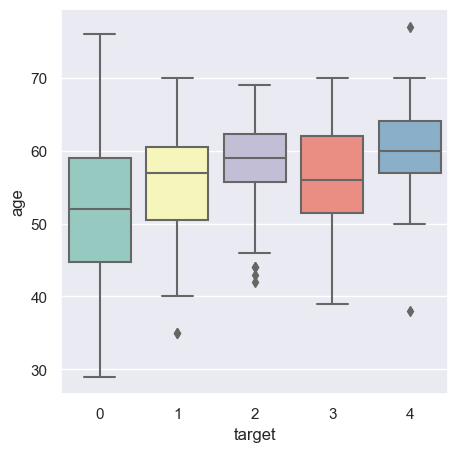

In [82]:
sns.set(rc = {'figure.figsize':(5,5)})
ax = sns.boxplot(x="target", y="age", data=hd, orient="v", palette="Set3")

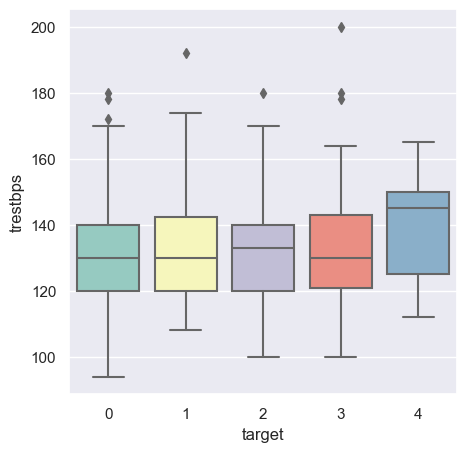

In [83]:
ax = sns.boxplot(x="target", y="trestbps", data=hd, orient="v", palette="Set3")

TODO: box plot each attribute using seaborn/matplotlib and see if any outliers

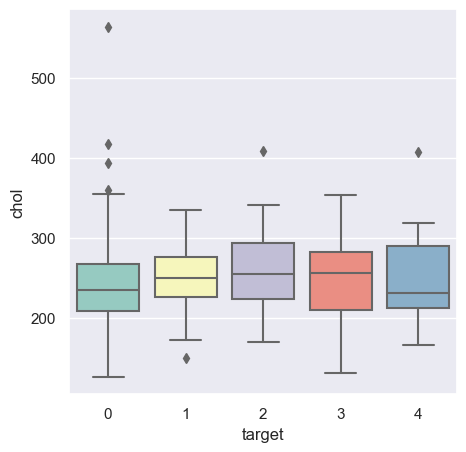

In [84]:
ax = sns.boxplot(x="target", y="chol", data=hd, orient="v", palette="Set3")

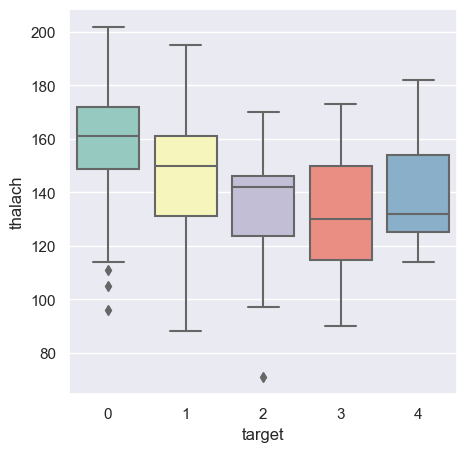

In [85]:
ax = sns.boxplot(x="target", y="thalach", data=hd, orient="v", palette="Set3")

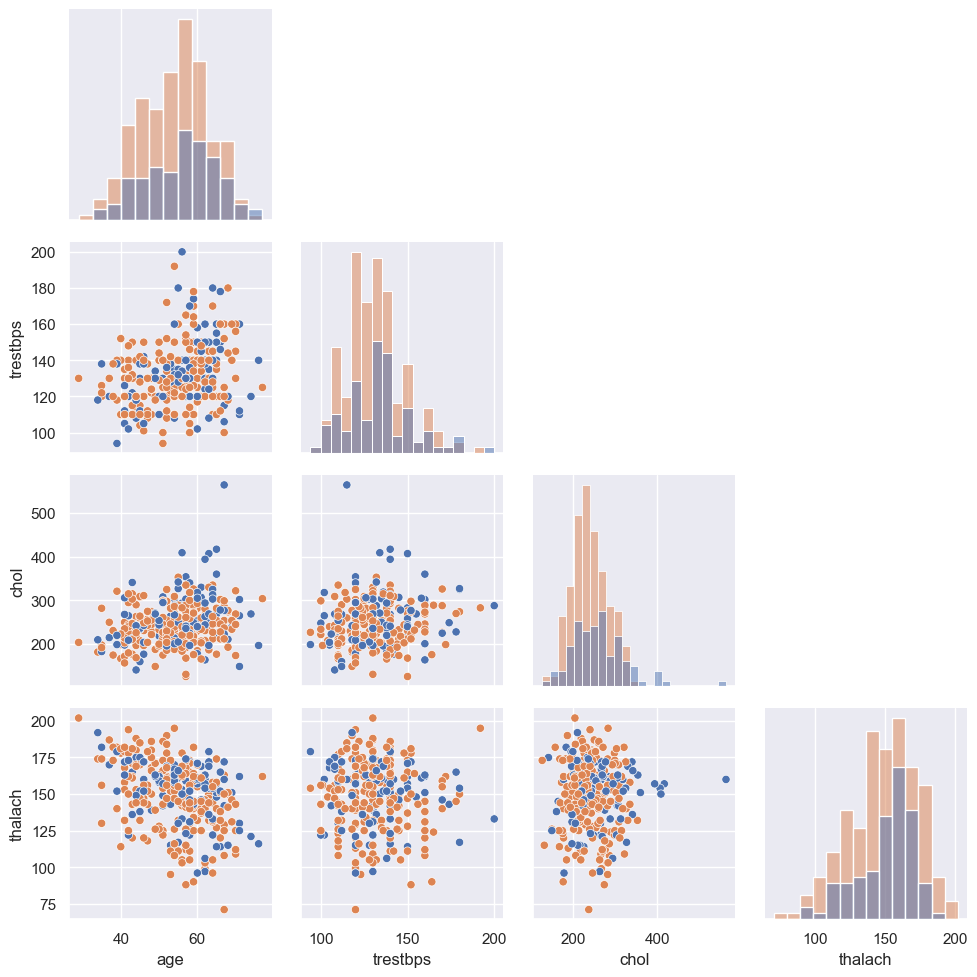

In [98]:
pairwise_viz = sns.PairGrid(hd, vars=integerAttributesKey, hue="sex", diag_sharey=False, corner=True)
pairwise_viz.map_lower(sns.scatterplot)
pairwise_viz.map_diag(sns.histplot)
# pairwise_viz.map_offdiag(sns.scatterplot)

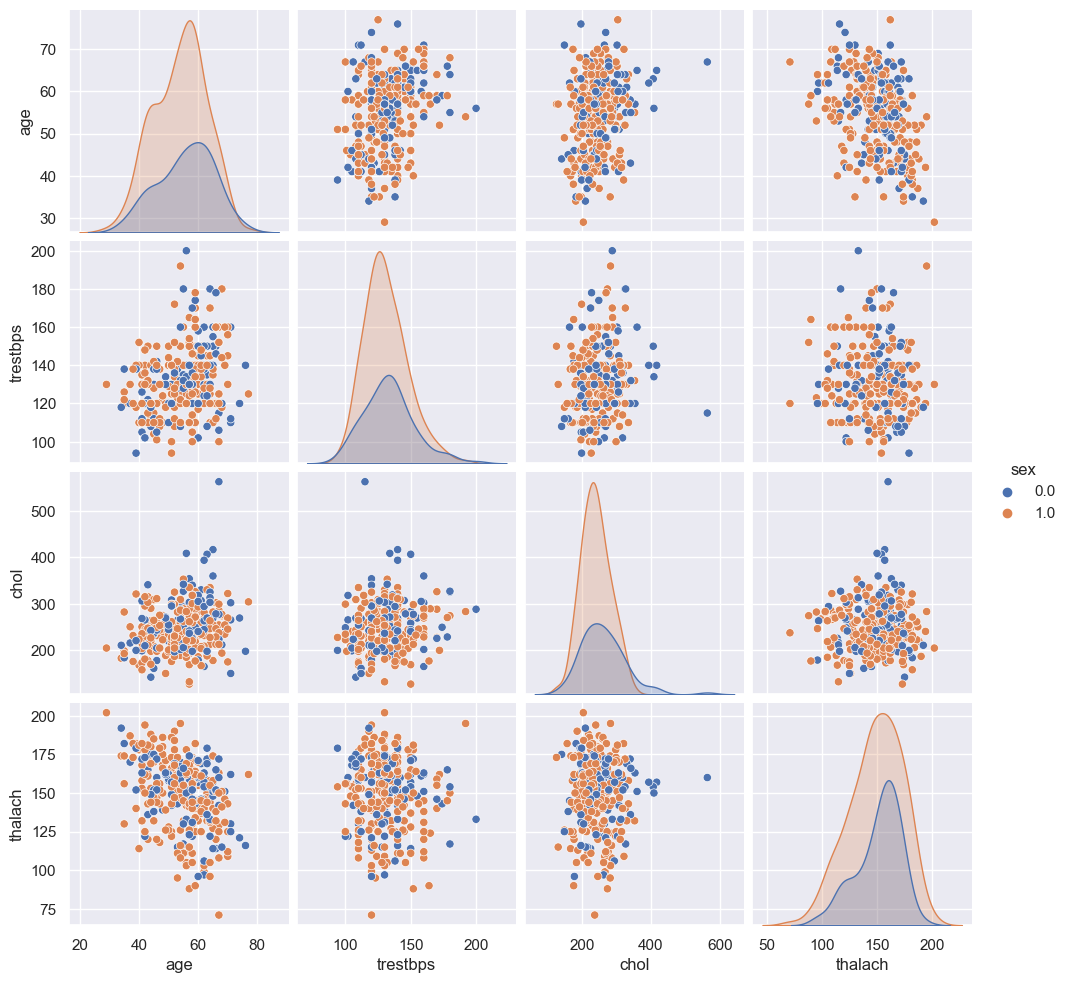

In [95]:
sns.pairplot(hd, hue="sex", vars=["age", "trestbps", "chol", "thalach"], height=2.5)

In [69]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

# Visualization


In [96]:
hd['target'].value_counts()

0    164
1     55
2     36
3     35
4     13
Name: target, dtype: int64

In [97]:
hd['target'].value_counts()

0    164
1     55
2     36
3     35
4     13
Name: target, dtype: int64

In [98]:
hd.loc[hd.target == 2] = 1
hd.loc[hd.target == 3] = 1
hd.loc[hd.target == 4] = 1

0    164
1    139
Name: target, dtype: int64


<AxesSubplot:>

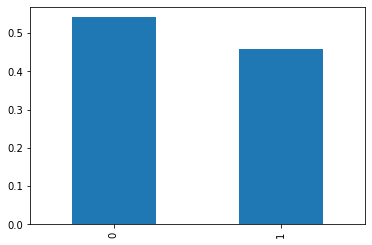

In [99]:
print(hd['target'].value_counts())

hd.target.value_counts(normalize=True).plot(kind='bar')


<AxesSubplot:>

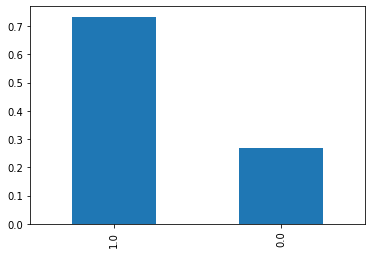

In [100]:
hd.sex.value_counts(normalize=True).plot(kind='bar')

/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

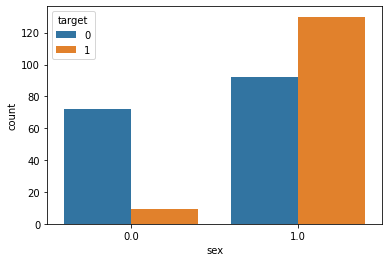

In [101]:
sns.countplot('sex', data=hd, hue='target')

# Fast Visualization

# Description of the attributes
1. age - age in years 

2. sex - (1 = male; 0 = female) 

3. cp - chest pain type 

0: Typical angina: chest pain related decrease blood supply to the heart 

1: Atypical angina: chest pain not related to heart 

2: Non-anginal pain: typically esophageal spasms (non heart related) 

3: Asymptomatic: chest pain not showing signs of disease 

4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern 

5. chol - serum cholestoral in mg/dl 

serum = LDL + HDL + .2 * triglycerides 

above 200 is cause for concern 

6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 

'>126' mg/dL signals diabetes 

7. restecg - resting electrocardiographic results 

0: Nothing to note 

1: ST-T Wave abnormality 

can range from mild symptoms to severe problems 

signals non-normal heart beat 

2: Possible or definite left ventricular hypertrophy 

Enlarged heart's main pumping chamber 

8. thalach - maximum heart rate achieved 

9. exang - exercise induced angina (1 = yes; 0 = no) 

10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more 

11. slope - the slope of the peak exercise ST segment 

0: Upsloping: better heart rate with excercise (uncommon) 

1: Flatsloping: minimal change (typical healthy heart) 

2: Downslopins: signs of unhealthy heart 

12. ca - number of major vessels (0-3) colored by flourosopy 

colored vessel means the doctor can see the blood passing through 

the more blood movement the better (no clots) 

13. thal - thalium stress result 

1,3: normal 

6: fixed defect: used to be defect but ok now 

7: reversable defect: no proper blood movement when exercising 

14. target - have disease or not (1=yes, 0=no) (= the predicted attribute) 

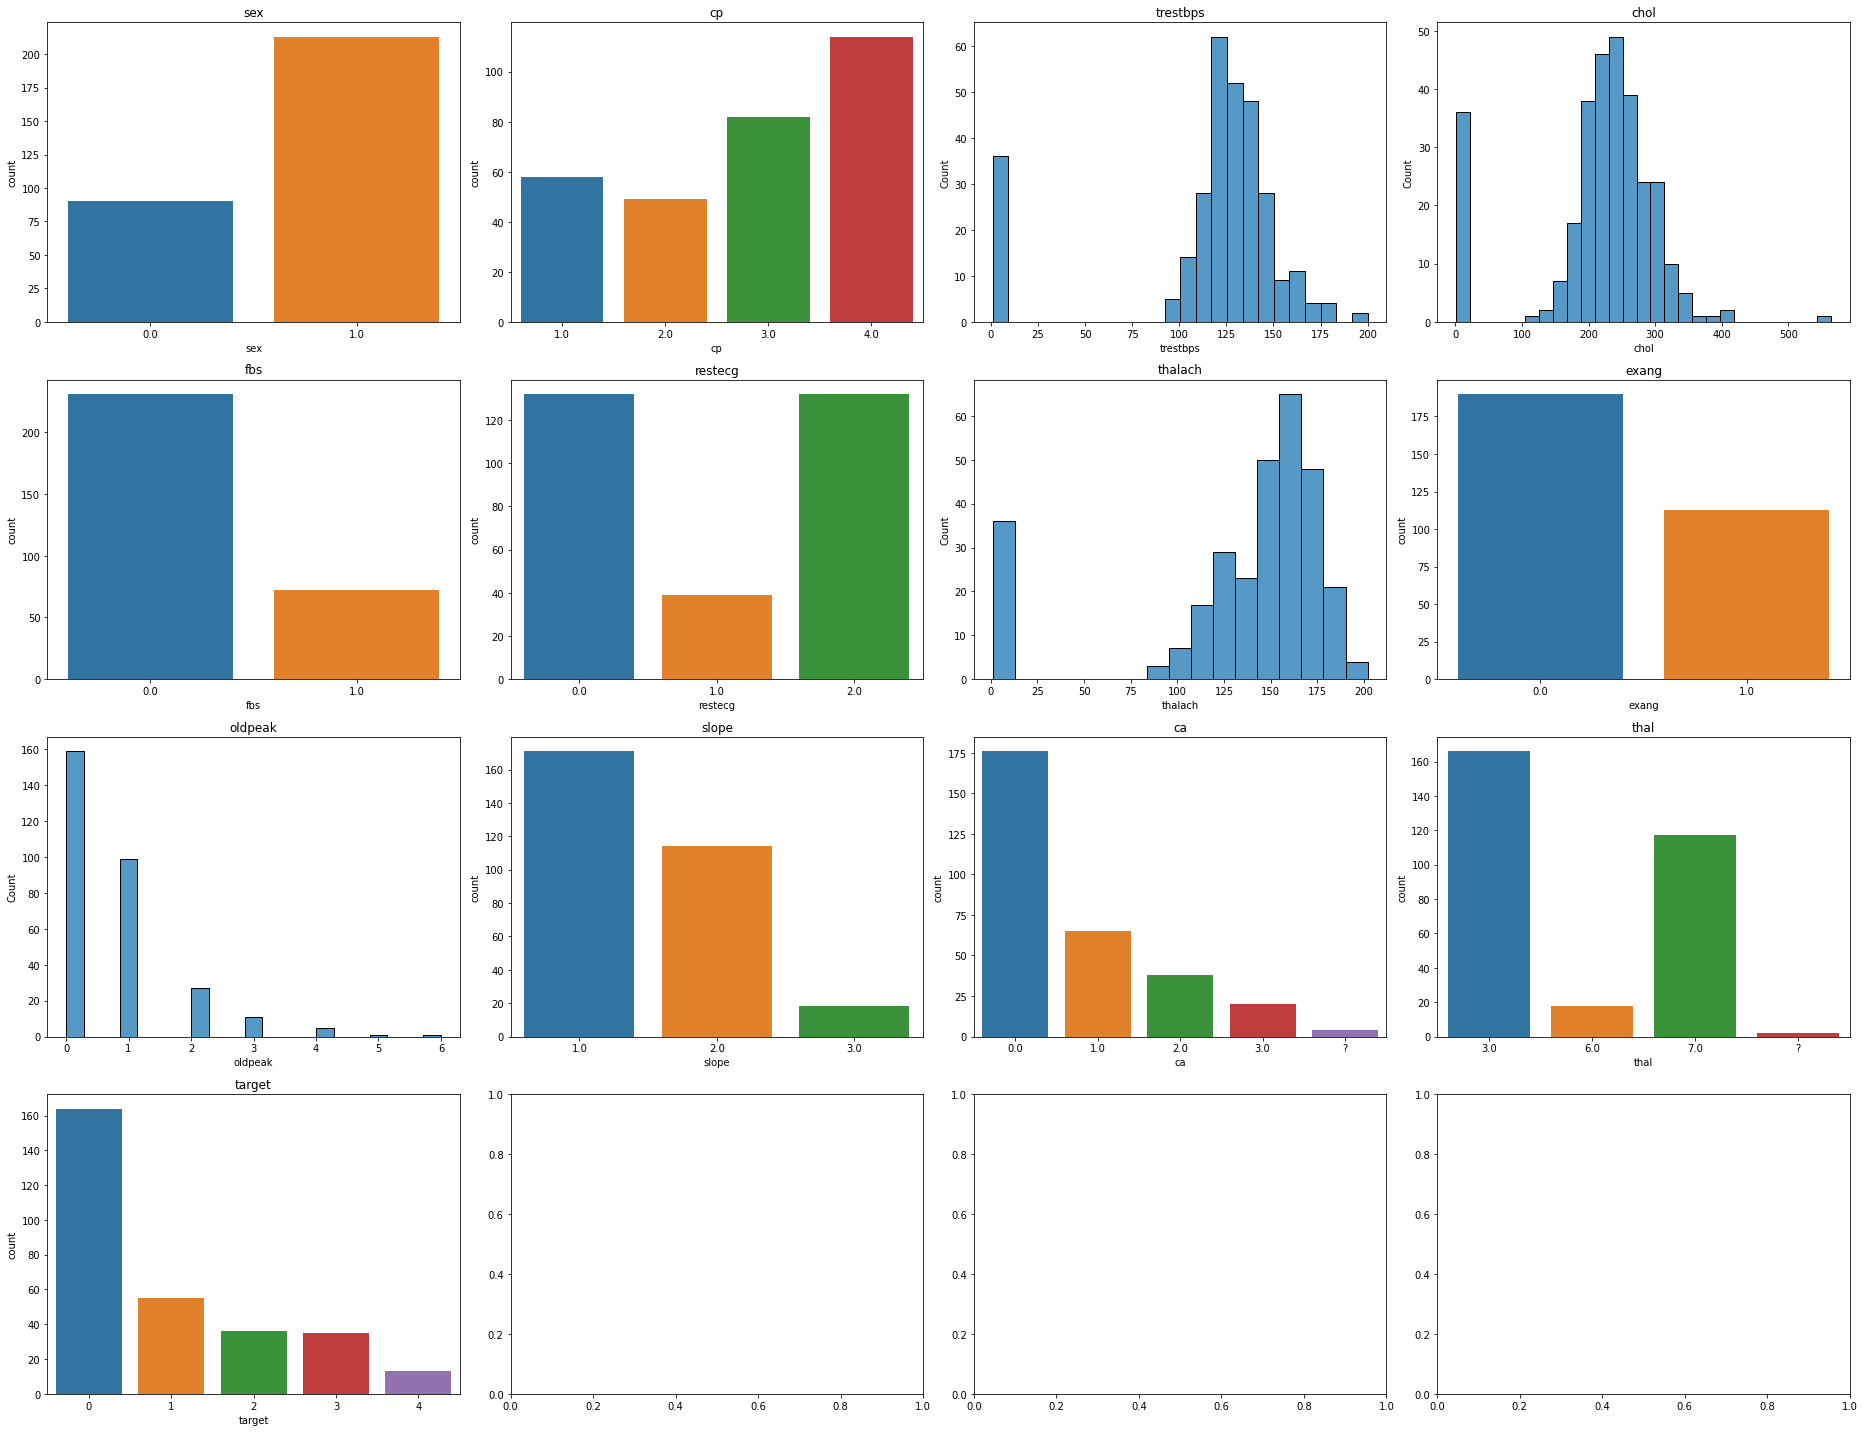

In [88]:

fig, axes = plt.subplots(4,4,figsize=(26,20))
# We will not plot country because it has too many categories.
for i, c in enumerate(hd.columns[1:]):
    ax = axes.reshape(-1)[i]
    if hd[c].dtype.kind == 'O':
        a = sns.countplot(x=c,data=hd,ax=ax)
    else:
        b = sns.histplot(x=c,data=hd,ax=ax)
    t = ax.set_title(c)
plt.tight_layout()

It looks like some attriubutes have lots of 1's. Let's explore that to see how many.

In [102]:
print((hd['thalach'] == 1).sum())
print((hd['trestbps'] == 1).sum())
print((hd['chol'] == 1).sum())
print((hd['oldpeak'] == 1).sum())

84
84
84
136


TODO: Cycle through all the attributes and compare to target using seaborn

Interesting... the first three attributes all have 84 instances where the value is "1". This may be a "missing" value.
TODO: Read about what those three attributes are, and how the testing was done to gain those values. What does the 1 mean?

Let's see how the attributes are related to target variable

In [ ]:
import matplotlib.pyplot as plt

df1 = hd.select_dtypes([np.int, np.float, np.object])
for i, col in enumerate(df1.columns):
    plt.figure(i)
    sns.countplot(x=col, data=df1,hue='target')
    
